In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from mord import LogisticAT
import time

In [39]:
df = pd.read_csv("../0.Datasets/processed/processed_car_data.csv")
# df = pd.read_csv("../0.Datasets/processed/sliced_car_data.csv")
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,sale_day,sale_date
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue,2014-12-16 12:30:00
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue,2014-12-16 12:30:00
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu,2015-01-15 04:30:00
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu,2015-01-29 04:30:00
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu,2014-12-18 12:30:00


In [40]:
#creating new column for the ordinomial logistic
conditions = [
    (df['condition'] >= 0) & (df['condition'] < 20),
    (df['condition'] >= 20) & (df['condition'] < 40),
    (df['condition'] >= 40)
]
choices = ['good', 'better', 'best']

df['condition_level'] = np.select(conditions, choices, default='unknown')

In [41]:
x = df [['odometer','mmr']]
x

,odometer,mmr
0,16639.0,20500.0
1,9393.0,20800.0
2,1331.0,31900.0
3,14282.0,27500.0
4,2641.0,66000.0
...,...,...
558828,18255.0,35300.0
558829,54393.0,30200.0
558830,50561.0,29800.0
558831,16658.0,15100.0


In [42]:

df['condition'] = df['condition'].astype('str')

y = df['condition_level']

y

0           good
1           good
2           best
3           best
4           best
           ...  
558828      best
558829      good
558830      best
558831    better
558832    better
Name: condition_level, Length: 558833, dtype: object

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state=42)

In [44]:
label = LabelEncoder()
y_train_encoded = label.fit_transform(y_train)
y_test_encoded = label.transform(y_test)

In [45]:
log_reg = LogisticAT()


In [46]:
start = time.time()
log_reg.fit(x_train, y_train_encoded)
end = time.time()
print(f"execution time : {end - start}")

execution time : 12.706554174423218


In [47]:
y_predict = log_reg.predict(x_test)
y_predict

array([1, 1, 1, ..., 1, 1, 1])

In [48]:
y_test_encoded

array([2, 1, 1, ..., 1, 1, 0])

In [49]:
print(accuracy_score(y_test_encoded, y_predict))

0.5309036683566954


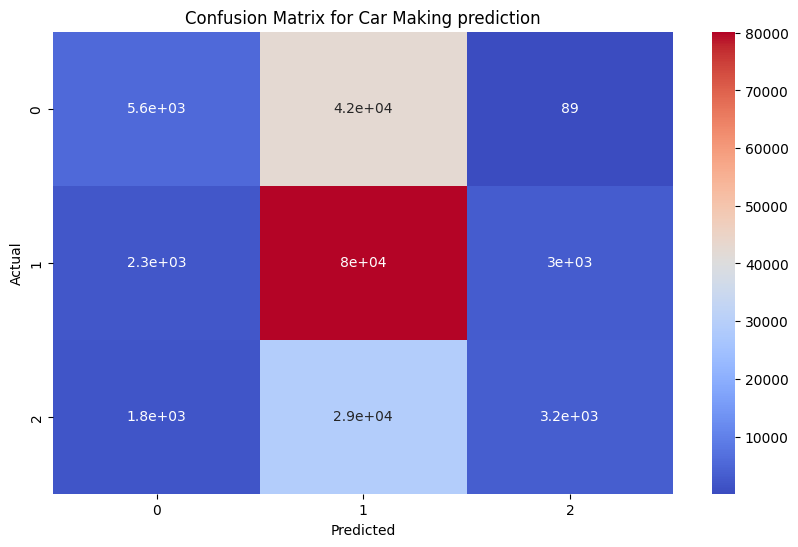

In [50]:
plt.figure(figsize=(10,6))
sns.heatmap(pd.DataFrame(confusion_matrix(y_test_encoded,y_predict)), annot= True, cmap='coolwarm',
            xticklabels=log_reg.classes_, yticklabels=log_reg.classes_
            )
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Car Making prediction')
plt.show()

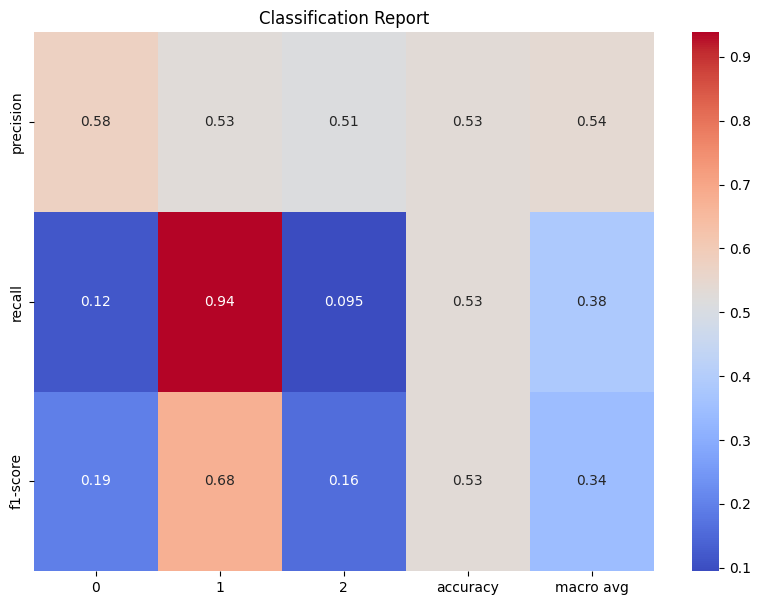

In [51]:
report = classification_report(y_test_encoded, y_predict, zero_division=1, output_dict=True)
report_df = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 7))
sns.heatmap(report_df.iloc[:-1, :-1].T, annot=True, cmap='coolwarm')
plt.title('Classification Report')
plt.show()

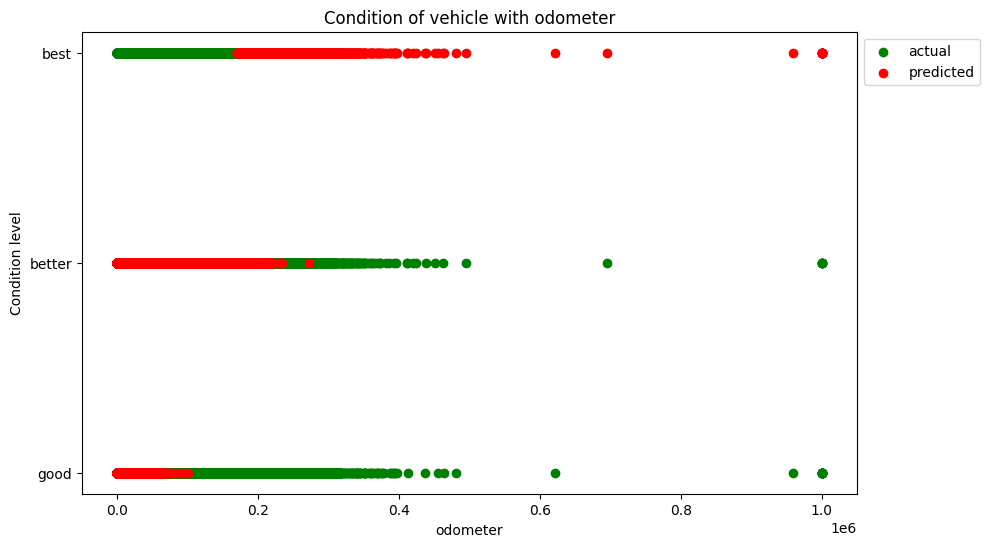

In [53]:
plt.figure(figsize = (10,6))

plt.scatter(x_test['odometer'], y_test, label ='actual', color='green', )
plt.scatter(x_test['odometer'], y_predict, label= 'predicted', color = 'red')

plt.xlabel('odometer')
plt.ylabel('Condition level')
plt.title("Condition of vehicle with odometer")

plt.legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.savefig("./Graph/3.Condition of vehicle with odometer.png")
plt.show()